## **Implementing Supervised Machine Learning algorithms.**

## **1.  Linear Regression (OLS)**

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

8523933535040602.0

In [ ]:
regressor.coef_

array([-1.32009600e+02,  3.06769154e+04,  1.08397388e+03,  1.90101409e+01,
        2.37333880e-01,  3.71830956e+02,  1.53998085e+01, -1.89987369e+02,
        1.81742101e+03,  3.07457393e+02,  7.81892779e+14,  7.81892779e+14,
        7.81892779e+14,  7.81892779e+14, -9.30582631e+15, -9.30582631e+15,
       -9.30582631e+15])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1331783.7318460518

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1154.0293461806125

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7815479752619792

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7809706828283869

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

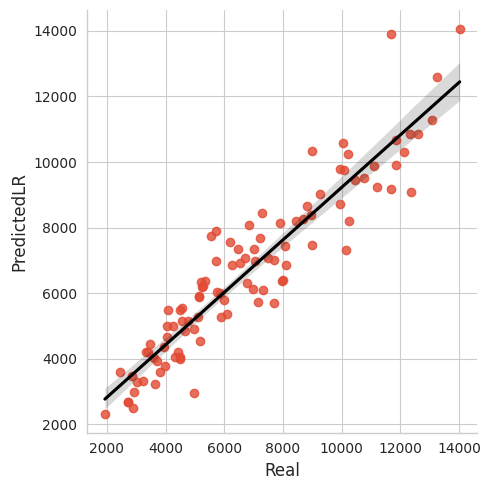

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

Linear Regression Custom Code Without Libraries

In [ ]:
# Custom MinMaxScaler
def min_max_scaler(X):
    X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return X_scaled

# Scaling the data
X_train_scaled = min_max_scaler(X_train)
X_test_scaled = min_max_scaler(X_test)


# Adding a column of ones to the input data for the intercept term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Normal equation: (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X_train_scaled.T.dot(X_train_scaled)).dot(X_train_scaled.T).dot(y_train)

# Extracting the intercept and coefficients
intercept = theta[0]
coefficients = theta[1:]

# Predicting the training set results
y_pred_train = X_train_scaled.dot(theta)

# Predicting the test set results
y_pred_test = X_test_scaled.dot(theta)

# Custom RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Custom MAPE function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Training and test RMSE
train_rmse = rmse(y_train, y_pred_train)
test_rmse = rmse(y_test, y_pred_test)

# Training and test MAPE
train_mape = mape(y_train, y_pred_train)
test_mape = mape(y_test, y_pred_test)

# Training and test R2 scores
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training RMSE:", train_rmse, "Testing RMSE:", test_rmse)
print("Training MAPE:", train_mape, "Testing MAPE:", test_mape)
print("Training R2:", train_r2, "Testing R2:", test_r2)


## **2. Decision Tree Regression**

In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 1.0 , Test Score : 0.9104346308113156
Training RMSE : 0.0 Testing RMSE : 737.9650401732156
Training MAPE : 0.0 Testing MAPE : 7.865796827936034


In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

Decision Tree Custom Code without Libraries

In [ ]:
from sklearn.metrics import mean_squared_error

# Custom RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Custom MAPE function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Training and test predictions
y_pred_train = treereg.predict(X_train)
y_pred_test = treereg.predict(X_test)

# Training and test R2 scores
train_r2 = 1 - (sum((y_train - y_pred_train) ** 2) / sum((y_train - np.mean(y_train)) ** 2))
test_r2 = 1 - (sum((y_test - y_pred_test) ** 2) / sum((y_test - np.mean(y_test)) ** 2))

print("Regression Model Score:", train_r2, ",", "Test Score:", test_r2)

# Calculate RMSE and MAPE for training and testing datasets
training_rmse = rmse(y_train, y_pred_train)
testing_rmse = rmse(y_test, y_pred_test)
training_mape = mape(y_train, y_pred_train)
testing_mape = mape(y_test, y_pred_test)

print("Training RMSE:", training_rmse, "Testing RMSE:", testing_rmse)
print("Training MAPE:", training_mape, "Testing MAPE:", testing_mape)


## **3. K-Nearest Neighbors Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

y_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

K-Nearst Without Libraries

In [ ]:
# Custom MinMaxScaler
def min_max_scaler(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Scaling the data
X_train_scaled = min_max_scaler(X_train)
X_test_scaled = min_max_scaler(X_test)


In [ ]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Custom KNN Regressor
class CustomKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = euclidean_distance(self.X_train, x)
            nearest_indices = distances.argsort()[:self.n_neighbors]
            nearest_values = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_values))
        return np.array(predictions)

# Initialize and fit the custom KNN Regressor
knn_custom = CustomKNNRegressor(n_neighbors=30)
knn_custom.fit(X_train_scaled, y_train)

# Predicting the training and test set results
y_pred_train_custom = knn_custom.predict(X_train_scaled)
y_pred_test_custom = knn_custom.predict(X_test_scaled)


In [ ]:
# Custom RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Custom MAPE function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Custom R2 Score function
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Training and test RMSE
train_rmse_custom = rmse(y_train, y_pred_train_custom)
test_rmse_custom = rmse(y_test, y_pred_test_custom)

# Training and test MAPE
train_mape_custom = mape(y_train, y_pred_train_custom)
test_mape_custom = mape(y_test, y_pred_test_custom)

# Training and test R2 scores
train_r2_custom = r2_score(y_train, y_pred_train_custom)
test_r2_custom = r2_score(y_test, y_pred_test_custom)

print("Training RMSE:", train_rmse_custom, "Testing RMSE:", test_rmse_custom)
print("Training MAPE:", train_mape_custom, "Testing MAPE:", test_mape_custom)
print("Training R2:", train_r2_custom, "Testing R2:", test_r2_custom)
